### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [145]:
# write you code here
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [146]:
# write you code here
insta_df = pd.read_csv('Instagram_data.csv', nrows=2000)

    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [147]:
# 10 first rows of the data
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [148]:
# insta_df shape
insta_df.shape

(2000, 13)

In [149]:
# insta_df column names
# insta_df.columns
insta_df.keys()

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [150]:
# insta_df row numbers:
len(insta_df)

2000

    5- Check the data type of each column ( 1 point)

In [151]:
# Print datatypes
insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [152]:
# Remove User uuid
del insta_df['User uuid']

# Remove User Likes Score
del insta_df['Likes Score']

# Remove all columns between column index 1 to 3
# I deleted thedate and time columns which is date posted, year, month, day, hour, minute
insta_df = insta_df.drop(insta_df.columns[5:11], axis=1)


# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [153]:
# write you code here
insta_df['Type'].unique()

array(['Image', 'Images', 'Video'], dtype=object)

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [154]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
insta_df['Type'] = label_encoder.fit_transform(insta_df['Type'])

##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [155]:
# a. How many NaNs as total
insta_df.isna().sum()

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
dtype: int64

In [156]:
# b. How many NaNs as a percentage of overall data
(insta_df.isna().sum() / len(insta_df)) * 100


Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
dtype: float64

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [157]:
# your featuers X:
X = insta_df.loc[:, insta_df.columns != 'Likes']
##
X 

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [158]:
# your target y:
y = insta_df.loc[:,'Likes']


##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

<Axes: >

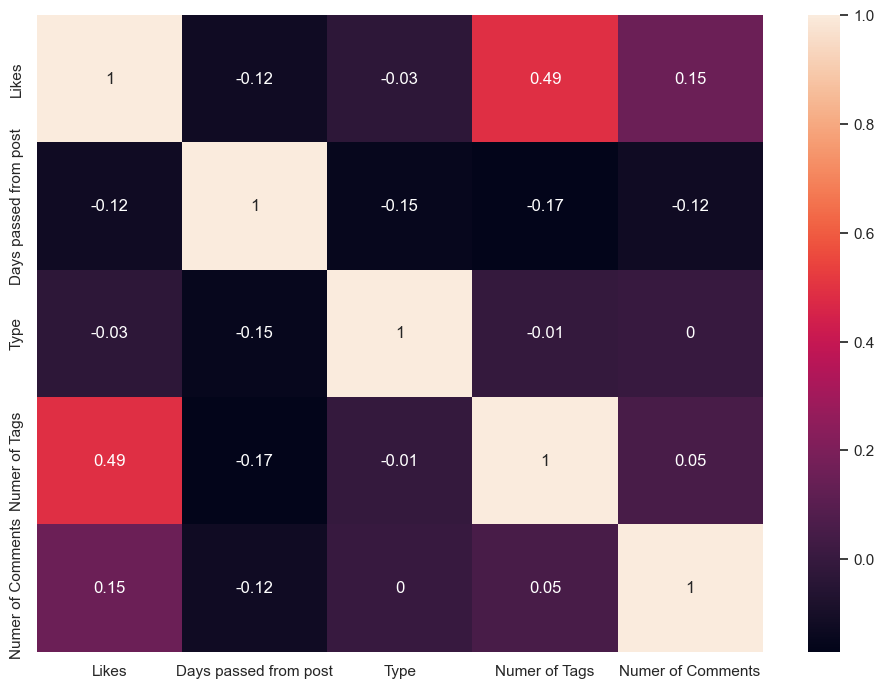

In [159]:
# write your code here:
corr = insta_df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=corr, annot=True)


 12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

-- Likes and number of tags seem to have moderate positive relationship.

-- Likes and number of comments has weak positive relationship

-- Likes and days passed from post has weak negative relationship



    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

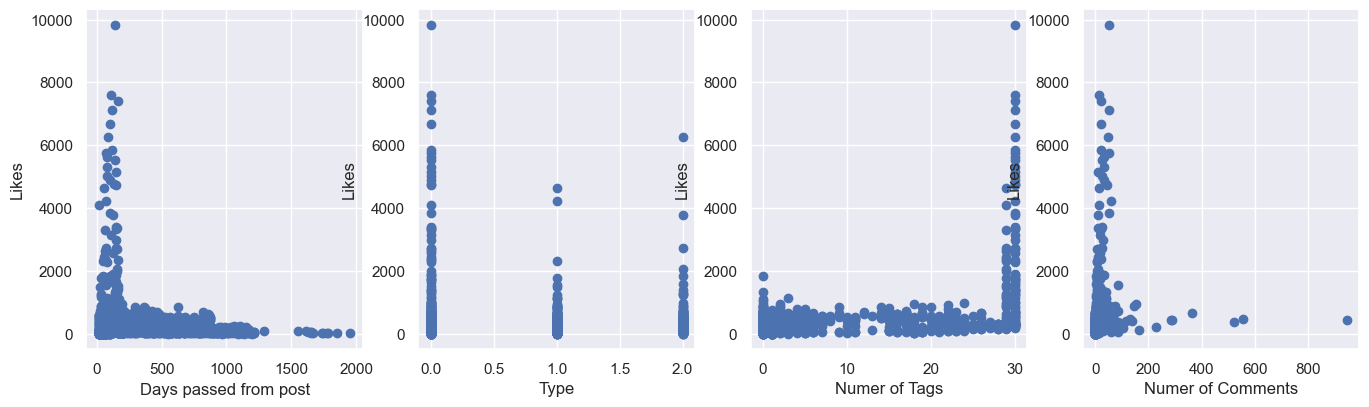

In [160]:
# write your code here
plt.figure(figsize = ( 25 , 15 )) 
features = list (X) 
for i, col in enumerate (features): 
    plt.subplot(3 , 6 ,i +1 ) 
    x = insta_df[col] 
    y = y 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col) 
    plt.ylabel( 'Likes' )

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

-- AS the days passed from post increases, likes are decreases, meaning older posts get fewer likes.

-- Posts of 0 type seem to get more likes.

-- AS days passed from post increases, number of likes increases too. Meaning posts with more tags get more likes

-- Posts with fewer than 200 seems to get more likes.

    15- Display the target distribution using histogram (1 points)

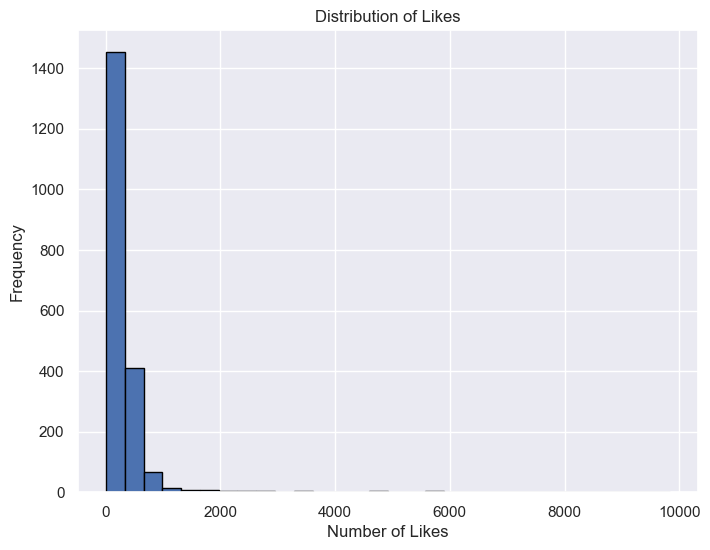

In [161]:
# write your code here:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()


    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

-- Distribution is likely right-skewed. Most posts recieve a low number of likes. While onlly few posts get more likes.


    17-Transfer the target y into log to have the normal distributions: (1 point)

In [162]:
#transfer the target y into log
y = np.log1p(y)  
y

0       6.228511
1       5.955837
2       5.924256
3       5.746203
4       6.242223
          ...   
1995    4.077537
1996    4.406719
1997    5.529429
1998    6.870053
1999    5.192957
Name: Likes, Length: 2000, dtype: float64

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [163]:
# Splitting the data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


# print the sizes of our training and test set:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1600, 4)
(400, 4)
(1600,)
(400,)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [164]:
# writer your code here:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
cv_scores_mse = cross_val_score(linear_pipe, X_train, y_train, 
                                cv=10, scoring='neg_mean_squared_error')
# Convert negated values back to positive
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(cv_scores_mse)) ))

Average 10-Fold CV MSE Score: 1.2292732341131316


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [165]:
# write your code here:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

alphas = [10**a for a in [-3, -2, 1, 2, 3]]

param_grid = {
    'ridge__alpha': alphas
}

grid = GridSearchCV(
    estimator=ridge_pipe,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)   

ridge_best_model = grid.best_estimator_
best_alpha = grid.best_params_['ridge__alpha']
best_neg_mse = grid.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best CV MSE: {-best_neg_mse:.8f}")


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best alpha: 100
Best CV MSE: 1.22748290


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
import numpy as np

lasso_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('lasso', Lasso(max_iter=10000, random_state=42))
])

alphas = [10**a for a in [-3, -2, 1, 2, 3]]

param_grid = {
    'lasso__alpha': alphas
}

grid = GridSearchCV(
    estimator=lasso_pipe,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train) 

lasso_best_model = grid.best_estimator_
best_alpha = grid.best_params_['lasso__alpha']
best_neg_mse = grid.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best CV MSE: {-best_neg_mse:.8f}")


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best alpha: 0.01
Best CV MSE: 1.22707996


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [167]:
from sklearn.linear_model import HuberRegressor

huber_pipe = Pipeline(steps=[
     ('scaler', StandardScaler(with_mean=False)),
    ("reg", HuberRegressor())
])

scores = cross_val_score(
    huber_pipe,
    X_train, y_train,
    scoring='neg_mean_squared_error',
    cv=10,
)

print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(scores)) ))



Average 10-Fold CV MSE Score: 1.5929394848703007


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [168]:
from sklearn.linear_model import RANSACRegressor

ransac_pipe = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False)),   
    ("reg", RANSACRegressor(estimator=LinearRegression(), random_state=42))
])

scores = cross_val_score(
    ransac_pipe,
    X_train, y_train,
    scoring='neg_mean_squared_error',
    cv=10,
)

print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(scores)) ))


Average 10-Fold CV MSE Score: 12.030554808632715


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

Linear MSE: cross, avg: 1.2292732341131316

Huber MSE: cross, avg : 1.5929394848703007

Ransac MSE: cross, avg: 12.030554808632715


Hyper parameter tuning best score:

Ridge MSE : 1.22748290

Lasso MSE:  1.22707996

Models that are using cross-validation's Linear model seems to perform good on average.



--

    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [169]:
# write your code here:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear": linear_pipe,
    "Ridge": ridge_best_model,
    "Lasso": lasso_best_model,
    "Huber": huber_pipe,
    "RANSAC": ransac_pipe
}

results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    results.append((name, -scores.mean()))

results_df = pd.DataFrame(results, columns=["Model", "MSE"]).sort_values("MSE")
print(results_df)

best_model = lasso_best_model


    Model        MSE
2   Lasso   1.227080
1   Ridge   1.227483
0  Linear   1.229273
3   Huber   1.592939
4  RANSAC  12.030555


    24- Predict the number of likes for test data and compute the MSE (5 points)

In [170]:
# write your code here:

y_pred = best_model.predict(X_test)

cv_scores_mse = cross_val_score(best_model, X_test, y_test, 
                                cv=10, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse
print("Average 5-Fold CV MSE Score: {:.4f}".format(np.mean(cv_scores_mse)))


Average 5-Fold CV MSE Score: 1.3779


    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include:
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation.

-- In this project, i predicted model to predicr number of likes on instragram posts. My features included days passed from post, type, number of tags, number of comments. 

-- The lasso and ridge regression models gave the lowest MSE values. These models worked well because they use regularization to control overfitting and handle correlated features.

-- Robust models like Huber and RANSAC did not do better because the dataset did not have many outliers, so they were less effective. After applying shrinkage methods, Ridge and Lasso showed more stable and accurate results.

--Linear regression is a way to predict a value using a straight-line relationship between input and output. It tries to find the best line that fits the data point.

--Cross-validation means checking how good the model is by splitting the data into parts. The model is trained on some parts and tested on others to see if it works well on new data. It helps make sure the model is fair and not just good on one dataset.

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---